In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
mappings = pd.read_csv('IDs_mapping.csv')
df = pd.read_csv('diabetic_data.csv')

df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [70]:
df = df.replace('?',np.NaN)
print(df.isnull().sum())
print('\n')

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [71]:
df = df.drop(['weight','payer_code','medical_specialty'],axis=1)


print(df.isnull().sum() / len(df) * 100)
print('\n')

encounter_id                0.000000
patient_nbr                 0.000000
race                        2.233555
gender                      0.000000
age                         0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.020636
diag_2                      0.351787
diag_3                      1.398306
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
g

In [72]:
missing_values = df.isna().sum()

columns_with_missing_values = missing_values[missing_values > 0]

# print('Which columns are contain missing values:',columns_with_missing_values.index.tolist(), '\n')


# for column_name in columns_with_missing_values.index:
#     print(f"Column: {column_name}")
#     unique_values = df[column_name].unique()
#     for value in unique_values:
#         print(value)
#     print('==============\n')

In [73]:
raceEncoded = pd.get_dummies(df['race'])
genderEncoded = pd.get_dummies(df['gender'])
maxGluEncoded = pd.get_dummies(df['max_glu_serum'])
dfEncoded = df.drop(['race','gender','max_glu_serum'], axis = 1)
dfEncoded = dfEncoded.join(raceEncoded)
dfEncoded = dfEncoded.join(genderEncoded)
dfEncoded = dfEncoded.join(maxGluEncoded)

dfEncoded

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,Caucasian,Hispanic,Other,Female,Male,Unknown/Invalid,>200,>300,None,Norm
0,2278392,8222157,[0-10),6,25,1,1,41,0,1,...,1,0,0,1,0,0,0,0,1,0
1,149190,55629189,[10-20),1,1,7,3,59,0,18,...,1,0,0,1,0,0,0,0,1,0
2,64410,86047875,[20-30),1,1,7,2,11,5,13,...,0,0,0,1,0,0,0,0,1,0
3,500364,82442376,[30-40),1,1,7,2,44,1,16,...,1,0,0,0,1,0,0,0,1,0
4,16680,42519267,[40-50),1,1,7,1,51,0,8,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,[70-80),1,3,7,3,51,0,16,...,0,0,0,0,1,0,0,0,1,0
101762,443847782,74694222,[80-90),1,4,5,5,33,3,18,...,0,0,0,1,0,0,0,0,1,0
101763,443854148,41088789,[70-80),1,1,7,1,53,0,9,...,1,0,0,0,1,0,0,0,1,0
101764,443857166,31693671,[80-90),2,3,7,10,45,2,21,...,1,0,0,1,0,0,0,0,1,0


In [74]:
categorical_columns = dfEncoded.select_dtypes(include=['object']).columns.tolist()

print(categorical_columns)

['age', 'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [75]:
columns_to_delete = ['diag_1', 'diag_2', 'diag_3']


for item in columns_to_delete:
    if item in categorical_columns:
        categorical_columns.remove(item)


categorical_columns

['age',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [76]:
for i in categorical_columns:
    print(i)
    for j in dfEncoded[i].unique():
        print(j)
    print('==================\n')

age
[0-10)
[10-20)
[20-30)
[30-40)
[40-50)
[50-60)
[60-70)
[70-80)
[80-90)
[90-100)

A1Cresult
None
>7
>8
Norm

metformin
No
Steady
Up
Down

repaglinide
No
Up
Steady
Down

nateglinide
No
Steady
Down
Up

chlorpropamide
No
Steady
Down
Up

glimepiride
No
Steady
Down
Up

acetohexamide
No
Steady

glipizide
No
Steady
Up
Down

glyburide
No
Steady
Up
Down

tolbutamide
No
Steady

pioglitazone
No
Steady
Up
Down

rosiglitazone
No
Steady
Up
Down

acarbose
No
Steady
Up
Down

miglitol
No
Steady
Down
Up

troglitazone
No
Steady

tolazamide
No
Steady
Up

examide
No

citoglipton
No

insulin
No
Up
Steady
Down

glyburide-metformin
No
Steady
Down
Up

glipizide-metformin
No
Steady

glimepiride-pioglitazone
No
Steady

metformin-rosiglitazone
No
Steady

metformin-pioglitazone
No
Steady

change
No
Ch

diabetesMed
No
Yes

readmitted
NO
>30
<30



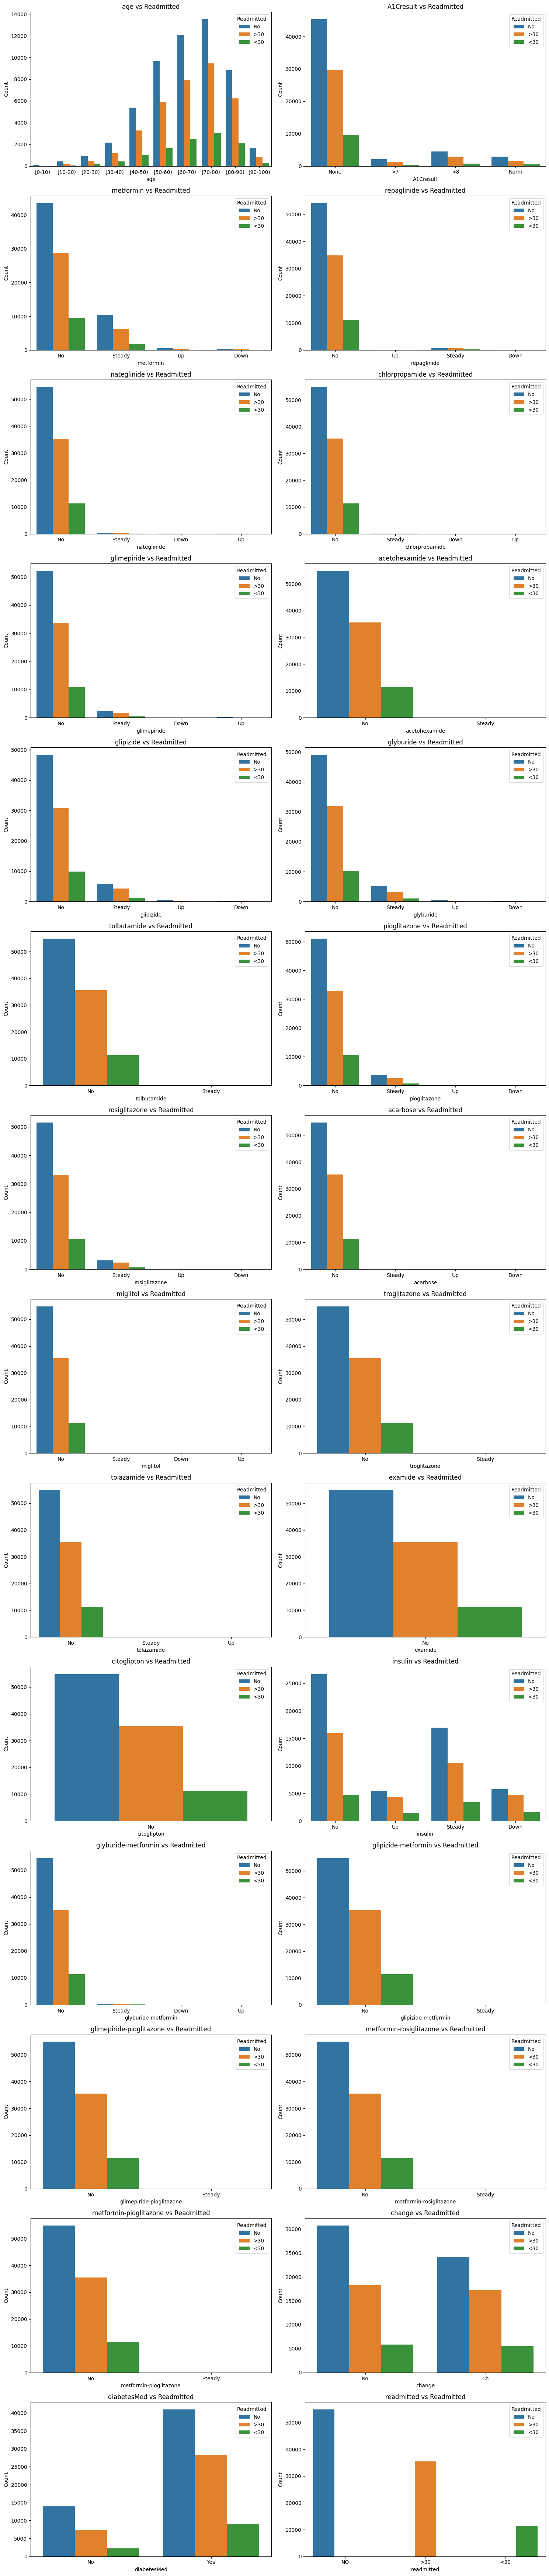

In [77]:
num_rows = len(categorical_columns) // 2 + len(categorical_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize = (15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]

    sns.countplot(x = column,
                  data = df,
                  hue = 'readmitted',
                  ax = ax)

    ax.set_title(f'{column} vs Readmitted')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title = 'Readmitted', labels = ['No', '>30', '<30'])

if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [78]:
dfEncoded.loc[dfEncoded['change'] == 'Ch', 'change'] = 1
dfEncoded.loc[dfEncoded['change'] == 'No', 'change'] = 0
dfEncoded.loc[dfEncoded['diabetesMed'] == 'No', 'diabetesMed'] = 0
dfEncoded.loc[dfEncoded['diabetesMed'] == 'Yes', 'diabetesMed'] = 1

In [79]:
dfEncoded.loc[dfEncoded['age'] == '[0-10)', 'age'] = 5
dfEncoded.loc[dfEncoded['age'] == '[10-20)', 'age'] = 15
dfEncoded.loc[dfEncoded['age'] == '[20-30)', 'age'] = 25
dfEncoded.loc[dfEncoded['age'] == '[30-40)', 'age'] = 35
dfEncoded.loc[dfEncoded['age'] == '[40-50)', 'age'] = 45
dfEncoded.loc[dfEncoded['age'] == '[50-60)', 'age'] = 55
dfEncoded.loc[dfEncoded['age'] == '[60-70)', 'age'] = 65
dfEncoded.loc[dfEncoded['age'] == '[70-80)', 'age'] = 75
dfEncoded.loc[dfEncoded['age'] == '[80-90)', 'age'] = 85
dfEncoded.loc[dfEncoded['age'] == '[90-100)', 'age'] = 95

In [80]:
X = dfEncoded.drop(['readmitted'],axis=1)
y = dfEncoded['readmitted']
print(X.shape)
print(y.shape)

(101766, 55)
(101766,)


In [81]:
X.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,Caucasian,Hispanic,Other,Female,Male,Unknown/Invalid,>200,>300,None,Norm
0,2278392,8222157,5,6,25,1,1,41,0,1,...,1,0,0,1,0,0,0,0,1,0
1,149190,55629189,15,1,1,7,3,59,0,18,...,1,0,0,1,0,0,0,0,1,0
2,64410,86047875,25,1,1,7,2,11,5,13,...,0,0,0,1,0,0,0,0,1,0
3,500364,82442376,35,1,1,7,2,44,1,16,...,1,0,0,0,1,0,0,0,1,0
4,16680,42519267,45,1,1,7,1,51,0,8,...,1,0,0,0,1,0,0,0,1,0


In [82]:
y.unique()

array(['NO', '>30', '<30'], dtype=object)

In [83]:
columns_to_encode = [
    'age', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed', 'race', 'gender', 'max_glu_serum'
]

df2 = df.copy()

for column_name in columns_to_encode:
    encoded_df_2 = pd.get_dummies(df[column_name],
                                  prefix = column_name,
                                  prefix_sep = '_')
    df2 = pd.concat([df2, encoded_df_2], axis = 1)
    df2.drop(column_name, axis = 1, inplace = True)

df2

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm
0,2278392,8222157,6,25,1,1,41,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,...,1,0,0,1,0,0,0,0,1,0
2,64410,86047875,1,1,7,2,11,5,13,2,...,0,0,0,1,0,0,0,0,1,0
3,500364,82442376,1,1,7,2,44,1,16,0,...,1,0,0,0,1,0,0,0,1,0
4,16680,42519267,1,1,7,1,51,0,8,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,...,0,0,0,0,1,0,0,0,1,0
101762,443847782,74694222,1,4,5,5,33,3,18,0,...,0,0,0,1,0,0,0,0,1,0
101763,443854148,41088789,1,1,7,1,53,0,9,1,...,1,0,0,0,1,0,0,0,1,0
101764,443857166,31693671,2,3,7,10,45,2,21,0,...,1,0,0,1,0,0,0,0,1,0


## Need to figure out things to do for these columns... too many to one hot encode

In [84]:
df2 = df2.drop(['diag_1', 'diag_2', 'diag_3'], axis = 1)
df2 = df2.replace('None', 0)


In [85]:
X = df2.drop(['readmitted'],axis=1)
y = df2['readmitted']
print(X.shape)
print(y.shape)

(101766, 114)
(101766,)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)


In [87]:
model = LogisticRegression()

In [88]:
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
print("Cross-Validation Scores:", scores)


Cross-Validation Scores: [0.54228336 0.54394153 0.54274659 0.54157966 0.54237809]


In [89]:
model.fit(X_train, y_train)

test_accuracy = model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.5383217058072124


In [90]:
### convert to binary to be able to look at recall, precision, etc ###
def map_to_binary(value):
    if value == '<30':
        return 1
    else:
        return 0

y = y.apply(map_to_binary)
y.unique()
######################################################################

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)



y_pred_cv = cross_val_predict(model, X_train, y_train, cv = 5)

cv_precision = cross_val_score(model,
                               X_train,
                               y_train,
                               cv = 5,
                               scoring = 'precision')

cv_recall = cross_val_score(model,
                            X_train,
                            y_train,
                            cv = 5,
                            scoring = 'recall')

cv_f1 = cross_val_score(model,
                        X_train,
                        y_train,
                        cv = 5,
                        scoring = 'f1')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('\n\n\n\n')
print("Cross-Validation Precision: {:.2f}".format(cv_precision.mean()))
print("Cross-Validation Recall: {:.2f}".format(cv_recall.mean()))
print("Cross-Validation F1-Score: {:.2f}".format(cv_f1.mean()))

print('\n\nConfusion Matrix:')
print(confusion_mat)

print('\n\nClassification Report:')
print(class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin






Cross-Validation Precision: 0.00
Cross-Validation Recall: 0.00
Cross-Validation F1-Score: 0.00

Confusion Matrix:
[[18069     0]
 [ 2285     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.00      0.00      0.00      2285

    accuracy                           0.89     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.79      0.89      0.83     20354



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
